In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
dataset = pd.read_csv(r'tweets.csv')

In [ ]:
dataset.head()

**#return percentage of every columns missing value , cols which have >90% missing values then drop them**

In [3]:
(len(dataset) - dataset.count())/len(dataset)

tweet_id                        0.000000
airline_sentiment               0.000000
airline_sentiment_confidence    0.000000
negativereason                  0.373087
negativereason_confidence       0.281284
airline                         0.000000
airline_sentiment_gold          0.997268
name                            0.000000
negativereason_gold             0.997814
retweet_count                   0.000000
text                            0.000000
tweet_coord                     0.930396
tweet_created                   0.000000
tweet_location                  0.323292
user_timezone                   0.329235
dtype: float64

In [4]:
dataset = dataset.drop(['airline_sentiment_gold','negativereason_gold','tweet_coord'],axis=1)

In [5]:
dataset.head(3)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)


In [6]:
mood_count=dataset['airline_sentiment'].value_counts()

In [7]:
mood_count

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

**Graphical representation of airline sentiment :-**

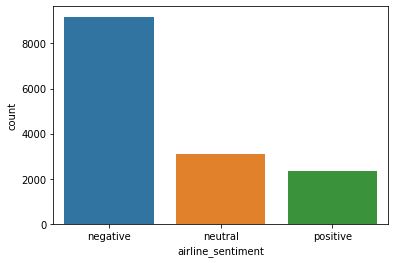

In [9]:
sns.countplot(x='airline_sentiment',data=dataset,order=['negative','neutral','positive'])
plt.show()

**Graphical representation of airline sentiment with airlines:-** 

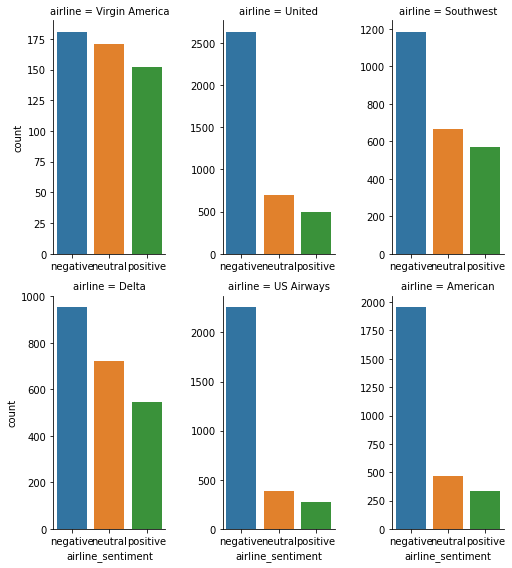

In [10]:
sns.catplot(x = 'airline_sentiment',data=dataset,
               order = ['negative','neutral','positive'],kind = 'count',col_wrap=3,col='airline',height=4,aspect=0.6,sharex=False,sharey=False)
plt.show()

In [11]:
dataset['negativereason'].value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

**Graphical representation of negativereason towards airlines:-**

/home/cdsw/.local/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/cdsw/.local/lib/python3.7/site-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


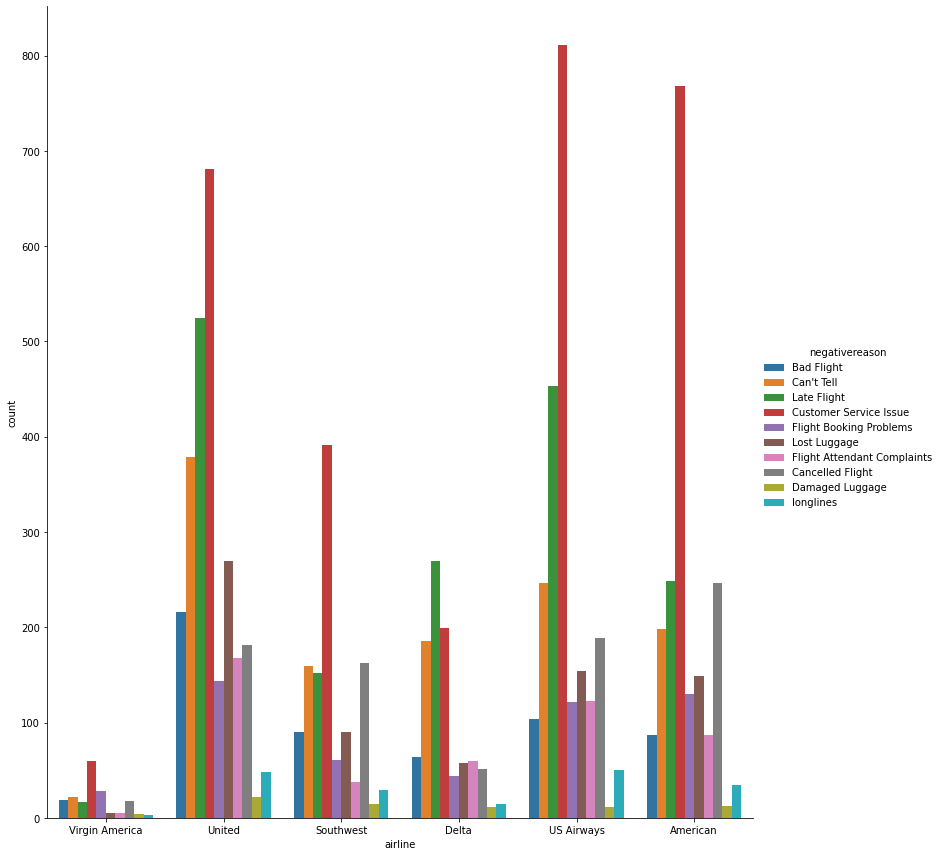

In [12]:
sns.factorplot(x = 'airline',data = dataset,kind = 'count',hue='negativereason',size=12,aspect=.9)
plt.show()

both above and below graph are same and for show the negative comment reason on different airlines

/home/cdsw/.local/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/cdsw/.local/lib/python3.7/site-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/cdsw/.local/lib/python3.7/site-packages/seaborn/categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


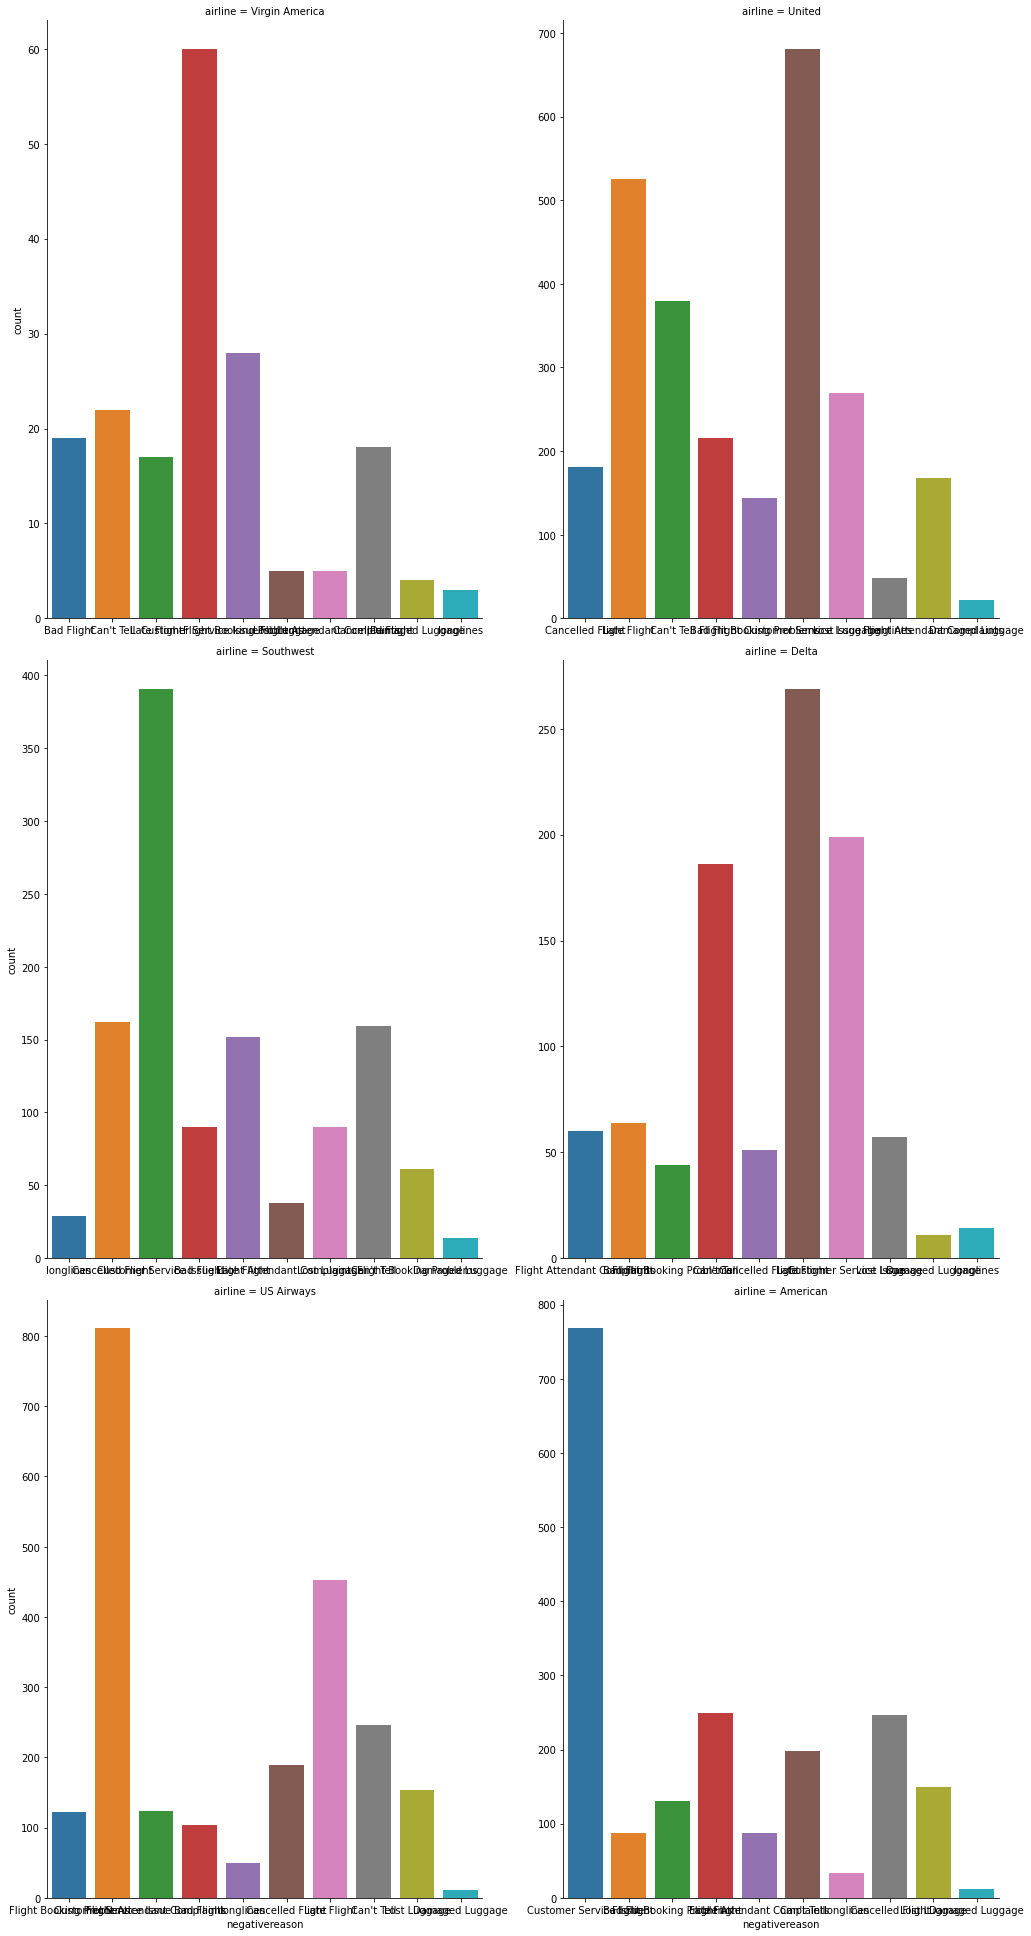

In [13]:
sns.factorplot(x = 'negativereason',data=dataset,kind='count',col='airline',size=9,aspect=.8,col_wrap=2,sharex=False,sharey=False)
plt.show()

**Data Cleaning and Preprocessing :-**

In [14]:
import re
import nltk
import time

In [15]:
start_time = time.time()
#remove words which are starts with @ symbols
dataset['text'] = dataset['text'].map(lambda x:re.sub('@\w*','',str(x)))
#remove special characters except [a-zA-Z]
dataset['text'] = dataset['text'].map(lambda x:re.sub('[^a-zA-Z]',' ',str(x)))
#remove link starts with https
dataset['text'] = dataset['text'].map(lambda x:re.sub('http.*','',str(x)))
end_time = time.time()

In [16]:
#total time consume to filter data
end_time-start_time

0.14177513122558594

In [17]:
dataset['text'].head()

0                                          What  said 
1     plus you ve added commercials to the experien...
2     I didn t today    Must mean I need to take an...
3     it s really aggressive to blast obnoxious  en...
4             and it s a really big bad thing about it
Name: text, dtype: object

In [18]:
dataset['text'] = dataset['text'].map(lambda x:str(x).lower())

In [19]:
dataset['text'].head(2)

0                                          what  said 
1     plus you ve added commercials to the experien...
Name: text, dtype: object

In [20]:
# nltk.download()

In [21]:
from nltk.corpus import stopwords

In [22]:
corpus = []

* Remove stopwords from comments 
* Not used  PorterStemmer to make words pure

In [23]:
none=dataset['text'].map(lambda x:corpus.append(' '.join([word for word in str(x).strip().split() if not word in set(stopwords.words('english'))])))                                     

In [24]:
corpus[:4]

['said',
 'plus added commercials experience tacky',
 'today must mean need take another trip',
 'really aggressive blast obnoxious entertainment guests faces amp little recourse']

**Training Part :-**

In [25]:
X = pd.DataFrame(data=corpus,columns=['comment_text'])

In [26]:
X.head()

,comment_text
0,said
1,plus added commercials experience tacky
2,today must mean need take another trip
3,really aggressive blast obnoxious entertainmen...
4,really big bad thing


In [27]:
y = dataset['airline_sentiment'].map({'neutral':1,'negative':-1,'positive':1})

In [28]:
y.head(2)

0    1
1    1
Name: airline_sentiment, dtype: int64

Split data into Train and Test:-

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [31]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(11712, 1) (2928, 1) (11712,) (2928,)


Use TfidfVectorizer for feature extraction :-

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
vector = TfidfVectorizer(stop_words='english',sublinear_tf=True,strip_accents='unicode',analyzer='word',token_pattern=r'\w{2,}',ngram_range=(1,1),max_features=30000)
#token_patten #2 for word length greater than 2>=

In [34]:
X_train_word_feature = vector.fit_transform(X_train['comment_text']).toarray()

In [35]:
X_test_word_feature = vector.transform(X_test['comment_text']).toarray()

In [36]:
print(X_train_word_feature.shape,X_test_word_feature.shape)

(11712, 9674) (2928, 9674)


Model Training :-

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [39]:
classifier = LogisticRegression()

In [40]:
classifier.fit(X_train_word_feature,y_train)

LogisticRegression()

In [41]:
y_pred = classifier.predict(X_test_word_feature)

In [42]:
cm = confusion_matrix(y_test,y_pred)

In [43]:
acc_score = accuracy_score(y_test,y_pred)

In [44]:
print(classification_report(y_test,y_pred),'\n',cm,'\n',acc_score)

              precision    recall  f1-score   support

          -1       0.82      0.90      0.86      1870
           1       0.79      0.64      0.71      1058

    accuracy                           0.81      2928
   macro avg       0.80      0.77      0.78      2928
weighted avg       0.81      0.81      0.80      2928
 
 [[1687  183]
 [ 377  681]] 
 0.8087431693989071


In [45]:
y_pred_prob = classifier.predict_proba(X_train_word_feature)

To determine probability of negative or positive comment :-

In [46]:
y_pred_prob[:5]

array([[0.67400743, 0.32599257],
       [0.88791131, 0.11208869],
       [0.82520187, 0.17479813],
       [0.99258803, 0.00741197],
       [0.24144253, 0.75855747]])